In [2]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
data = pd.read_csv('../data/student-por.csv')

In [4]:
Y = data[['G1', 'G2', 'G3']].sum(axis=1)
X = data.drop(['G1', 'G2', 'G3'], axis=1)
X = (X-X.min())/(X.max()-X.min())
Y = Y.apply(lambda x: 1 if x > 36 else 0)
plt.style.use('dark_background')


In [5]:
# prints out the number of 0s and 1s in each grade classification 
print(Y.value_counts())

0    373
1    276
Name: count, dtype: int64


<Axes: title={'center': 'Correlation with Final Grade'}>

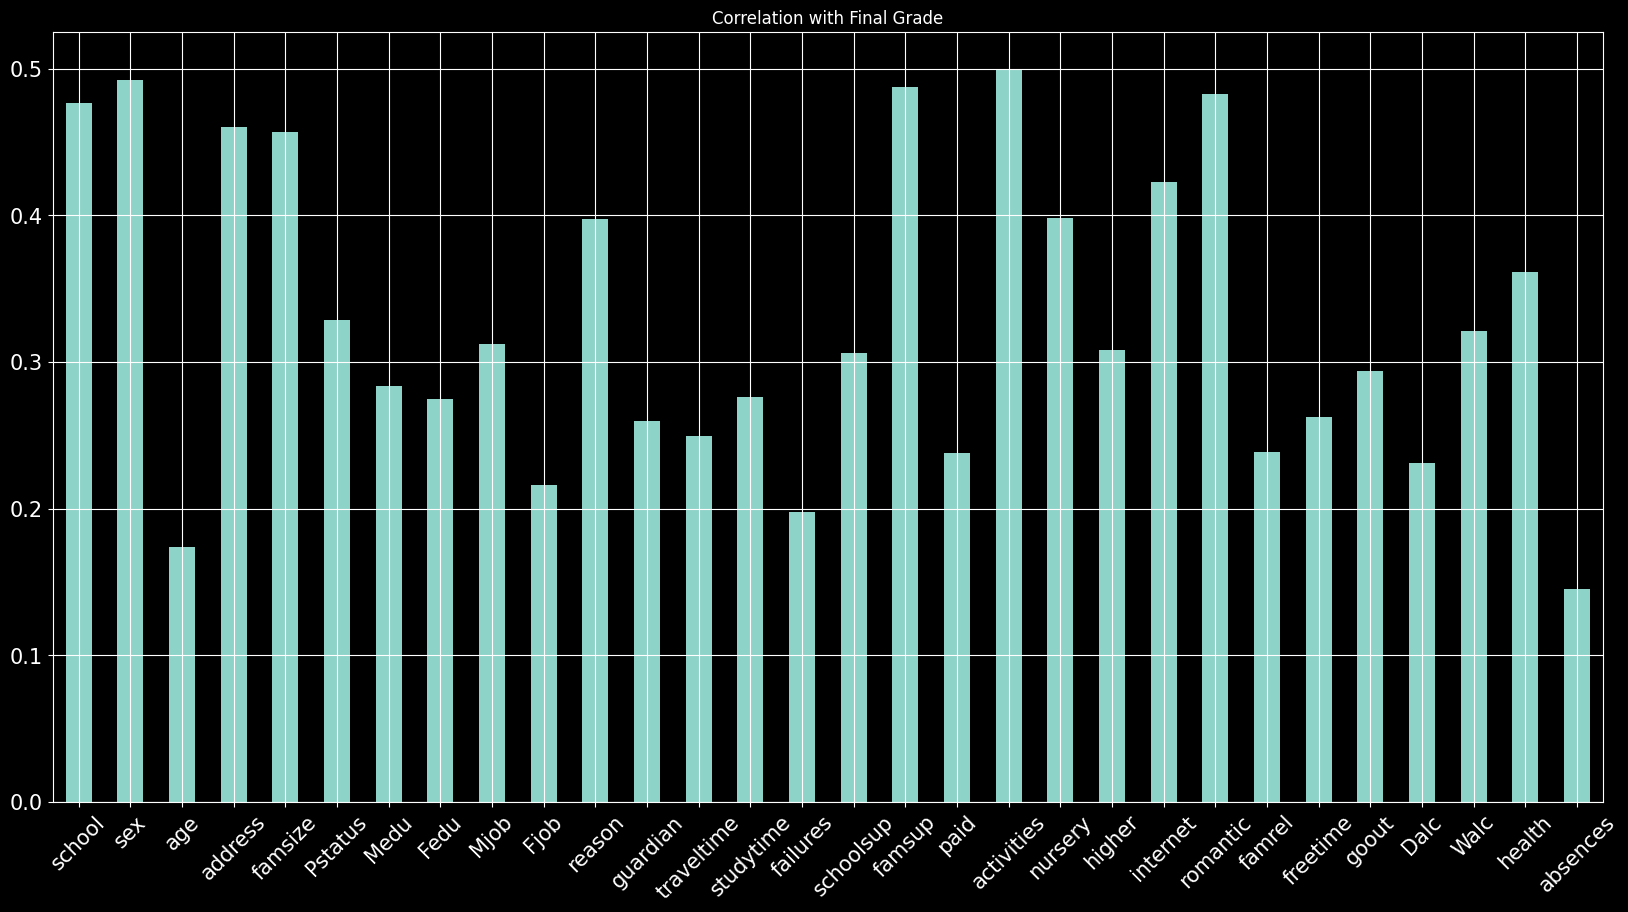

In [6]:
data.std()
X.std().plot(
    figsize = (20, 10),
    title = "Correlation with Final Grade",
    fontsize = 15,
    rot = 45,
    grid = True,
    kind="bar"
)

school       -0.216612
sex          -0.121178
age          -0.111140
address       0.154401
famsize       0.029692
Pstatus      -0.018757
Medu          0.250064
Fedu          0.210895
Mjob          0.152817
Fjob          0.079145
reason        0.122862
guardian     -0.080321
traveltime   -0.178832
studytime     0.196043
failures     -0.295689
schoolsup    -0.050051
famsup        0.004753
paid         -0.073249
activities    0.068846
nursery       0.066065
higher        0.276473
internet      0.126987
romantic     -0.081672
famrel        0.075510
freetime     -0.073464
goout        -0.084976
Dalc         -0.214624
Walc         -0.178247
health       -0.131542
absences     -0.149890
dtype: float64


<Axes: title={'center': 'Correlation with Final Grade'}>

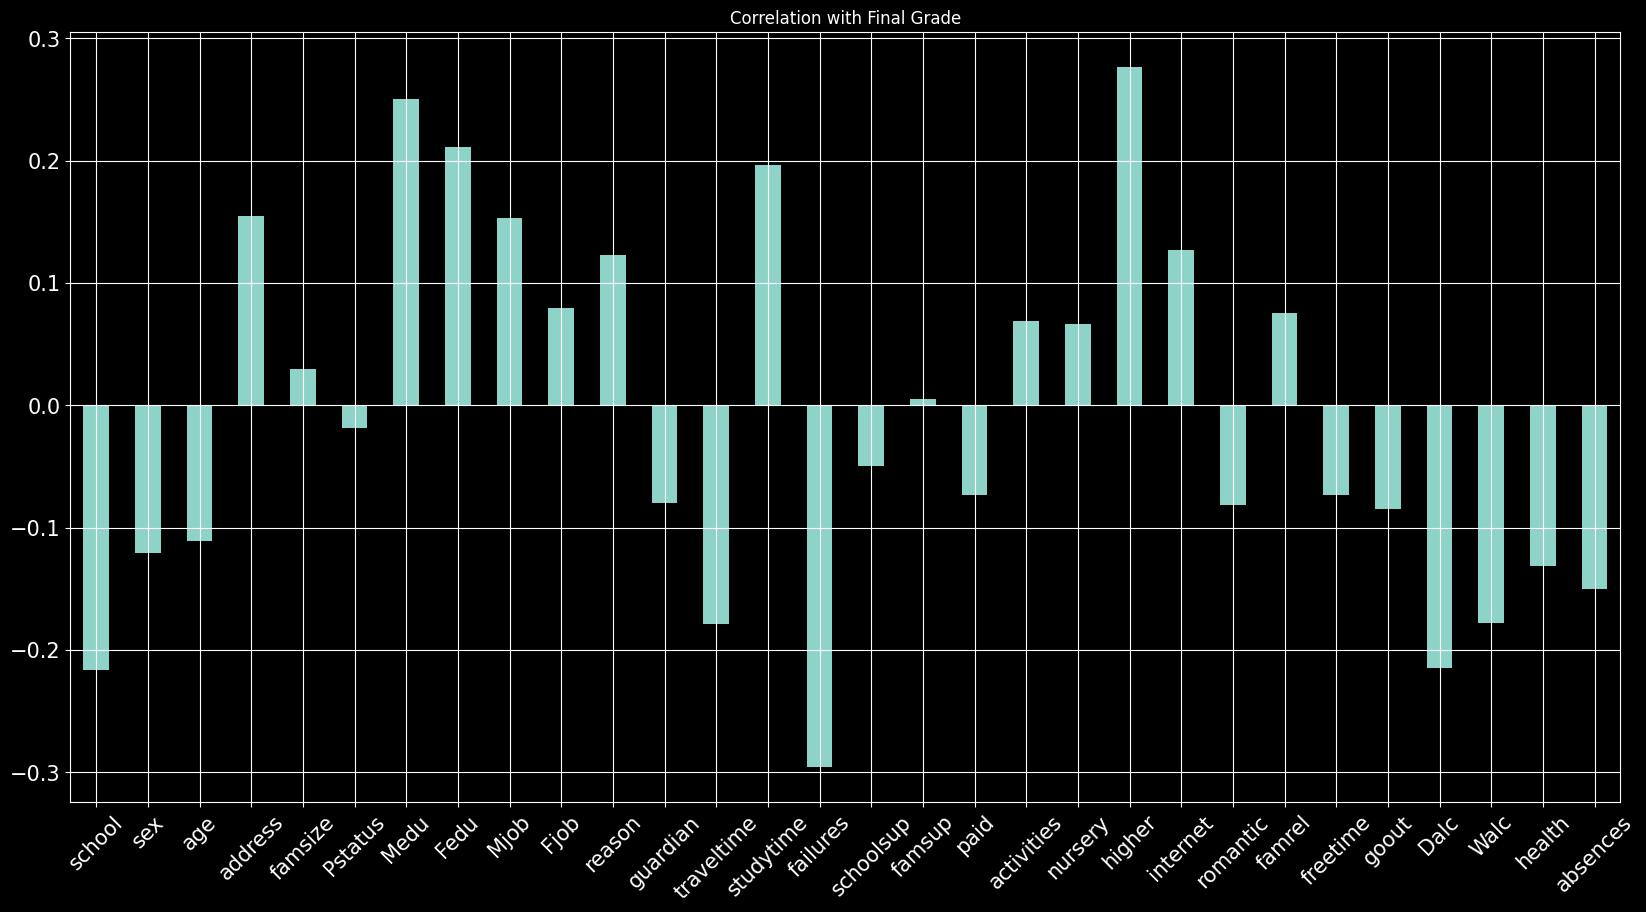

In [7]:
corr = X.corrwith(Y)
print(corr)
# plot correlation
corr.plot.bar(
    figsize = (20, 10),
    title = "Correlation with Final Grade",
    fontsize = 15,
    rot = 45,
    grid = True
)

school       -0.292626
sex          -0.104109
age          -0.174322
address       0.157127
famsize       0.047230
Pstatus       0.015251
Medu          0.260472
Fedu          0.217501
Mjob          0.181551
Fjob          0.109847
reason        0.155556
guardian     -0.122676
traveltime   -0.154120
studytime     0.260875
failures     -0.384210
schoolsup    -0.071779
famsup        0.038255
paid         -0.062784
activities    0.080123
nursery       0.031172
higher        0.349030
internet      0.139931
romantic     -0.074973
famrel        0.048795
freetime     -0.094497
goout        -0.074053
Dalc         -0.195171
Walc         -0.155649
health       -0.051647
absences     -0.147149
dtype: float64


<Axes: title={'center': 'Correlation with G1'}>

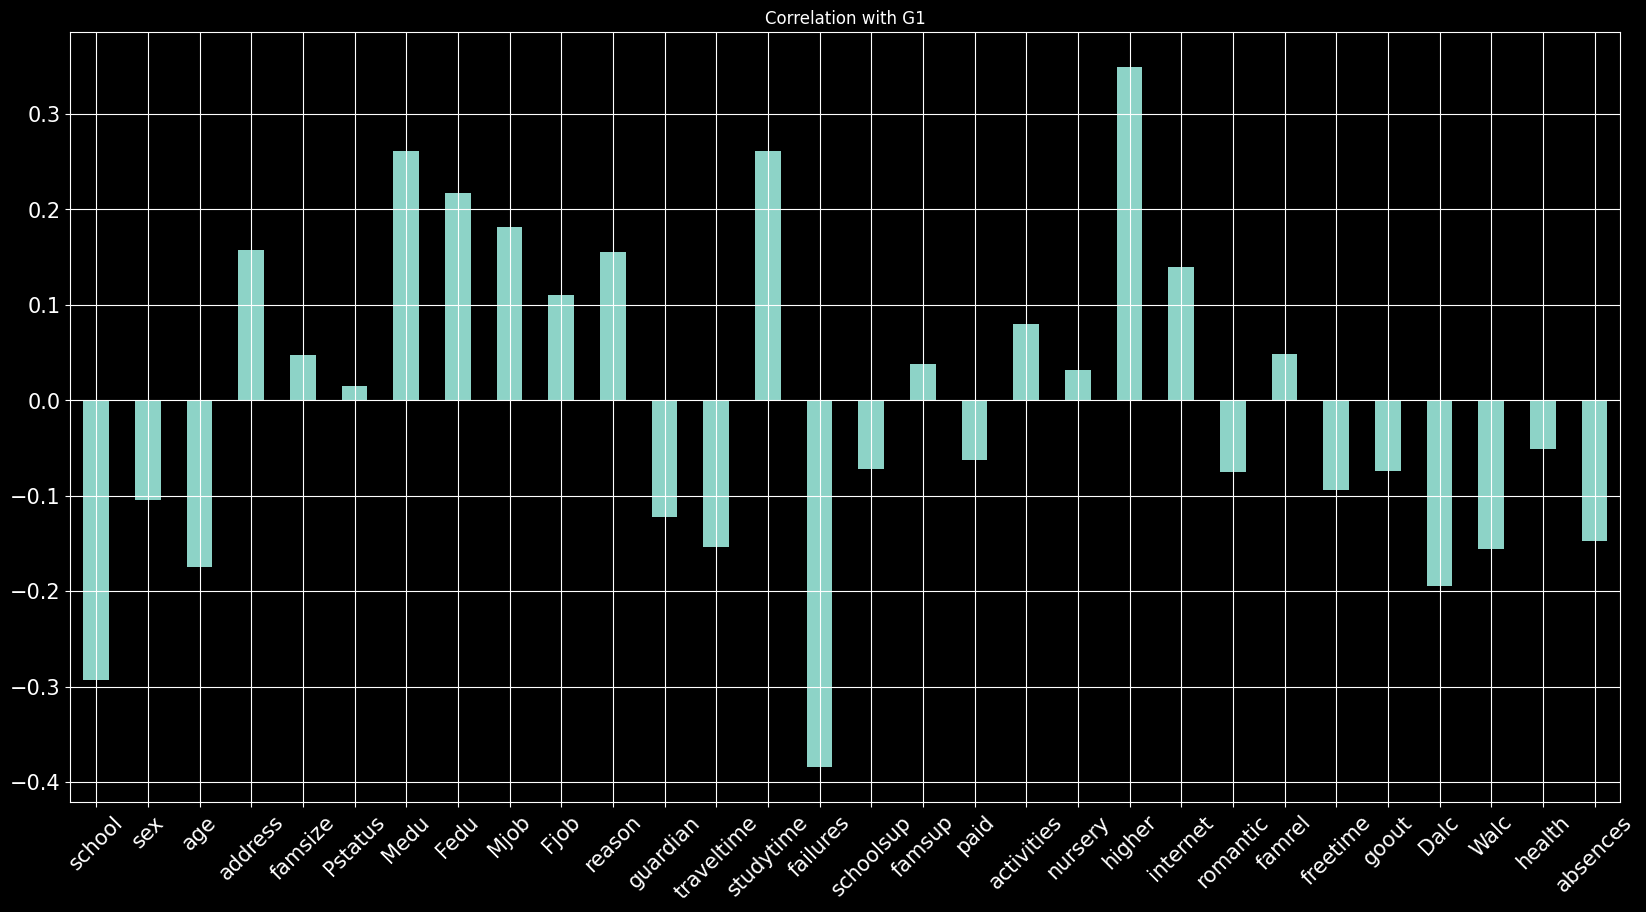

In [8]:
corr = X.corrwith(data["G1"])
print(corr)
# plot correlation
corr.plot.bar(
    figsize = (20, 10),
    title = "Correlation with G1",
    fontsize = 15,
    rot = 45,
    grid = True
)

school       -0.269776
sex          -0.104005
age          -0.107119
address       0.154600
famsize       0.038891
Pstatus       0.018689
Medu          0.264035
Fedu          0.225139
Mjob          0.153875
Fjob          0.086343
reason        0.157459
guardian     -0.097065
traveltime   -0.154489
studytime     0.240498
failures     -0.385782
schoolsup    -0.056624
famsup        0.038141
paid         -0.033925
activities    0.067154
nursery       0.039867
higher        0.331953
internet      0.147909
romantic     -0.097937
famrel        0.089588
freetime     -0.106678
goout        -0.079469
Dalc         -0.189480
Walc         -0.164852
health       -0.082179
absences     -0.124745
dtype: float64


<Axes: title={'center': 'Correlation with G2'}>

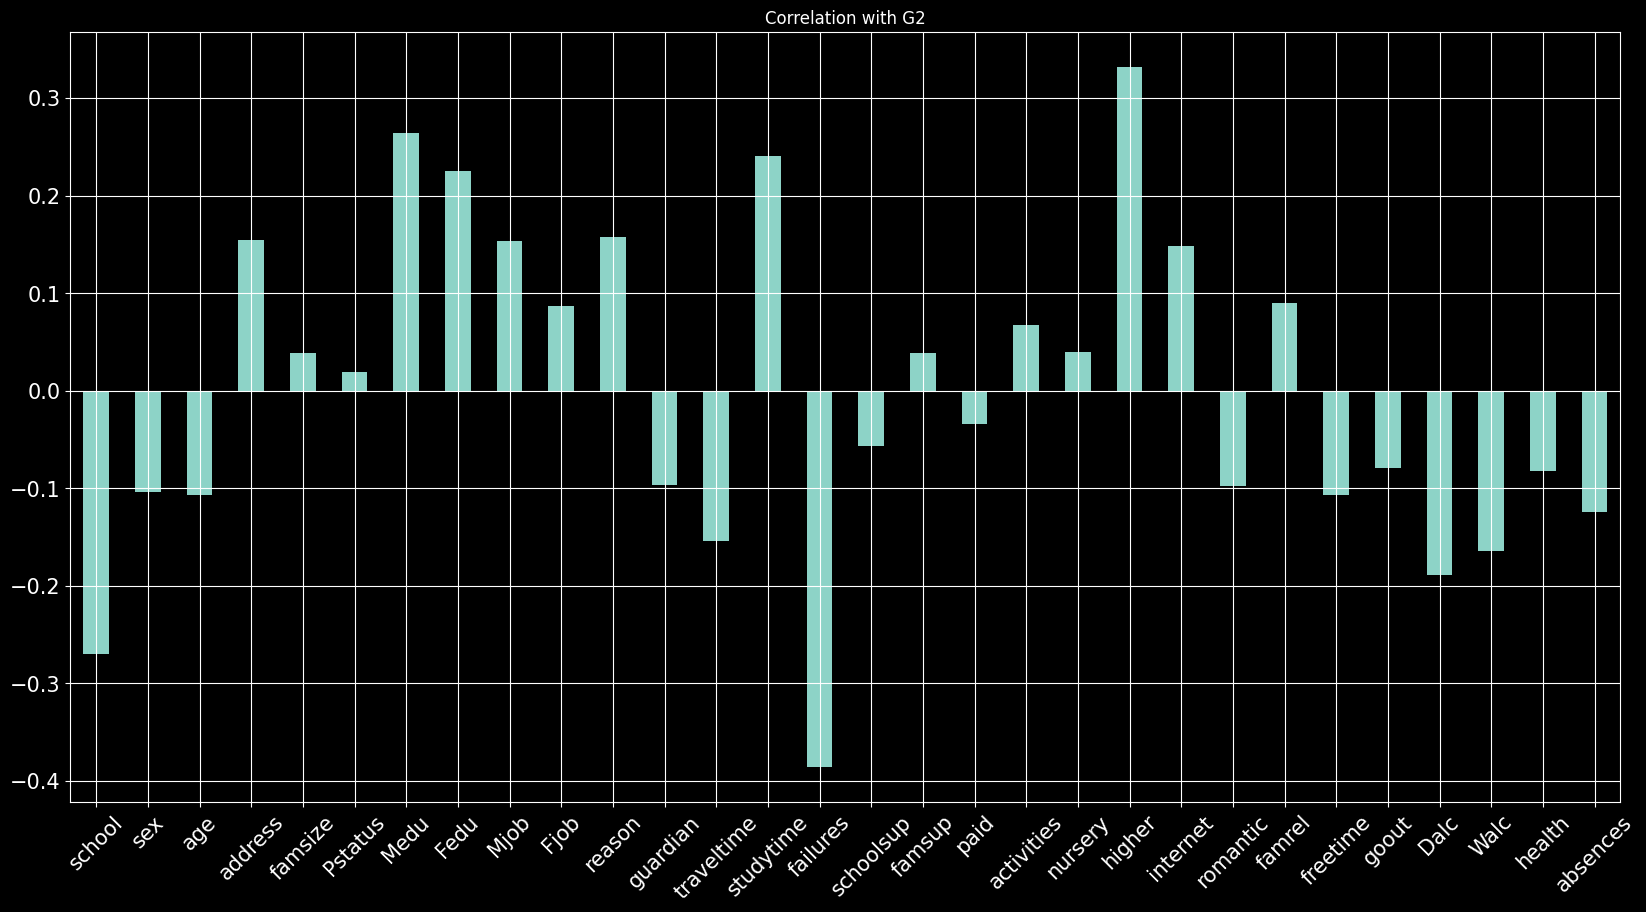

In [9]:
corr = X.corrwith(data["G2"])
print(corr)
# plot correlation
corr.plot.bar(
    figsize = (20, 10),
    title = "Correlation with G2",
    fontsize = 15,
    rot = 45,
    grid = True
)

school       -0.284294
sex          -0.129077
age          -0.106505
address       0.167637
famsize       0.045016
Pstatus      -0.000754
Medu          0.240151
Fedu          0.211800
Mjob          0.148252
Fjob          0.052953
reason        0.124969
guardian     -0.079609
traveltime   -0.127173
studytime     0.249789
failures     -0.393316
schoolsup    -0.066405
famsup        0.059206
paid         -0.054898
activities    0.059791
nursery       0.028752
higher        0.332172
internet      0.150025
romantic     -0.090583
famrel        0.063361
freetime     -0.122705
goout        -0.087641
Dalc         -0.204719
Walc         -0.176619
health       -0.098851
absences     -0.091379
dtype: float64


<Axes: title={'center': 'Correlation with G3'}>

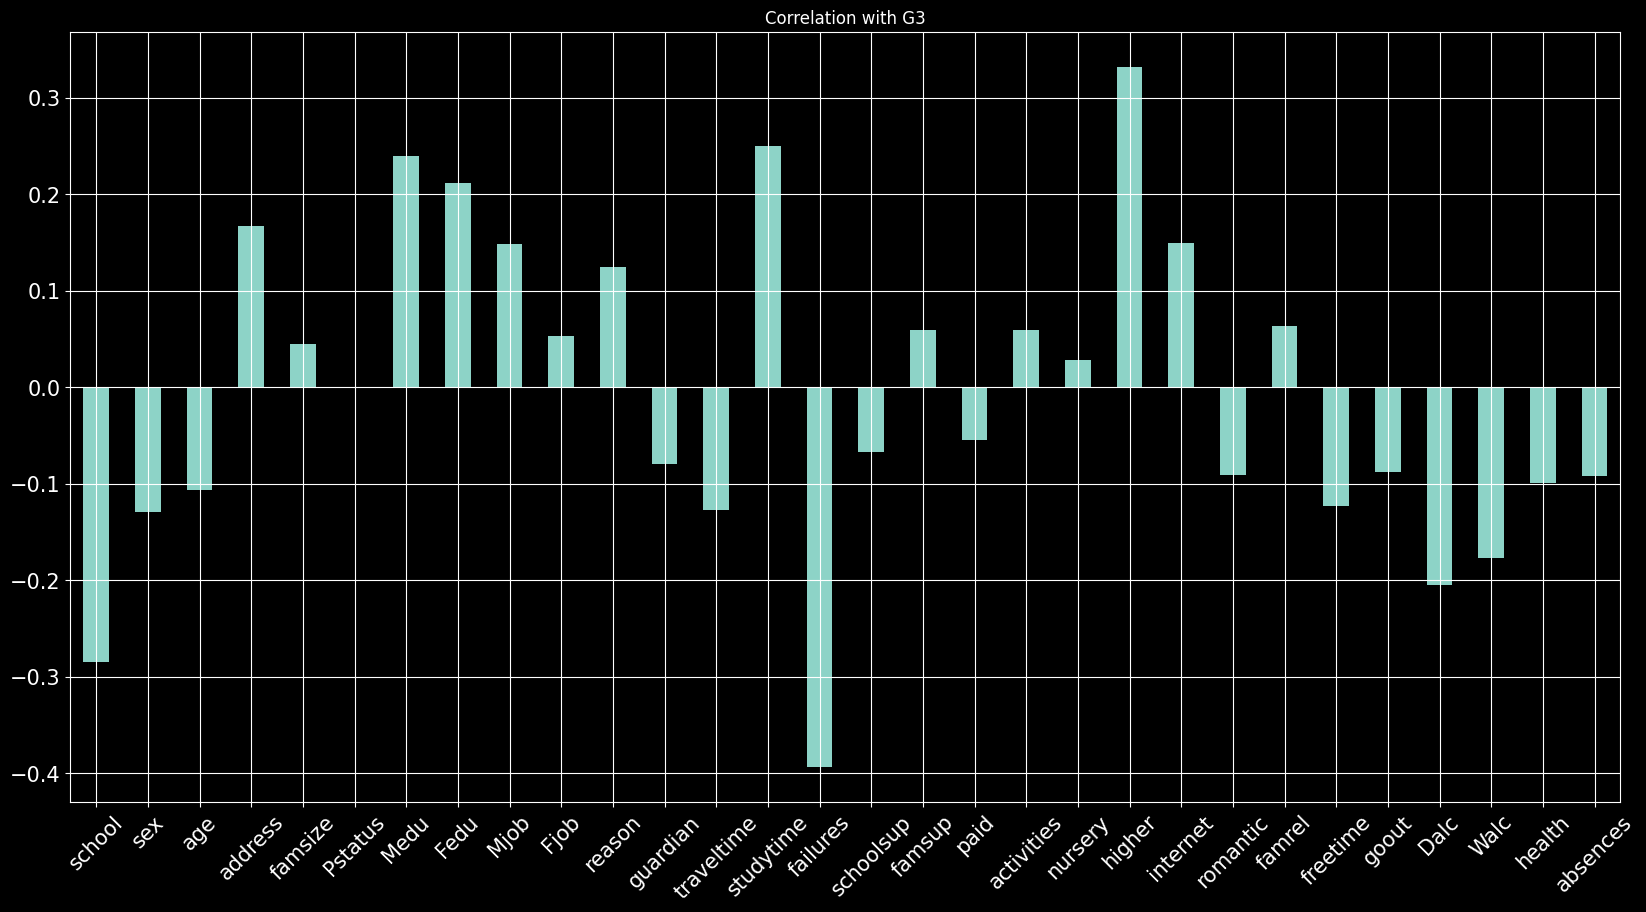

In [10]:
corr = X.corrwith(data["G3"])
print(corr)
# plot correlation
corr.plot.bar(
    figsize = (20, 10),
    title = "Correlation with G3",
    fontsize = 15,
    rot = 45,
    grid = True
)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(30)
L_sk = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print('L_sk.shape:', L_sk.shape)


[0.11397246 0.09177979 0.07526411 0.06875527 0.06262613 0.06071489
 0.04985033 0.04426737 0.04270601 0.03919684 0.03729151 0.03354062
 0.03132663 0.02914511 0.02476489 0.02290744 0.02169056 0.01954619
 0.01792237 0.01665185 0.01449061 0.01384722 0.01238833 0.01179414
 0.01076413 0.00925666 0.00703921 0.00665812 0.00518606 0.00465515]
L_sk.shape: (649, 30)


Explained variance ratio for 30 components in 0 dim: 0.11397246395470281
Explained variance ratio for 30 components in 1 dim: 0.20575225111524695
Explained variance ratio for 30 components in 2 dim: 0.28101635882156084
Explained variance ratio for 30 components in 3 dim: 0.3497716258663351
Explained variance ratio for 30 components in 4 dim: 0.41239775739888757
Explained variance ratio for 30 components in 5 dim: 0.47311264548928833
Explained variance ratio for 30 components in 6 dim: 0.5229629783271169
Explained variance ratio for 30 components in 7 dim: 0.5672303501600313
Explained variance ratio for 30 components in 8 dim: 0.6099363609391142
Explained variance ratio for 30 components in 9 dim: 0.6491331975637067
Explained variance ratio for 30 components in 10 dim: 0.6864247049360924
Explained variance ratio for 30 components in 11 dim: 0.7199653234498868
Explained variance ratio for 30 components in 12 dim: 0.7512919534932523
Explained variance ratio for 30 components in 13 dim: 0.

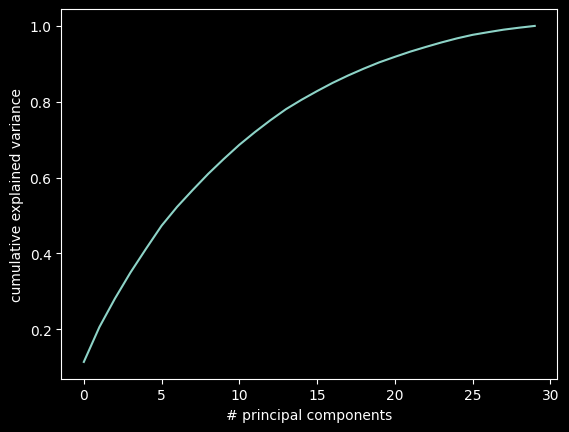

In [22]:
import numpy as np

cum_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');
plt.savefig('../plots/cumulative_explained_variance.png')
for i in range(30):
    print(f"Explained variance ratio for 30 components in {i} dim: {cum_explained_var_ratio[i]}")